# Fitting a Epsilon-Support Vector Regression

This notebook uses interactive widgets to visualize parameter tuning with a support vector regression

Go ahead and import `numpy`, `matplotlib`, and `ipywidgets` for this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

We want to create some toy data to fit with our non-linear regression. Go ahead and make it a fun mix of a `sine` and `cosine` function with some random noise thrown in for good measure. 

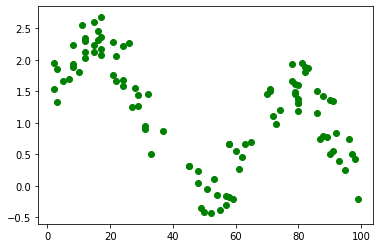

In [2]:
r = np.random.RandomState(2019)#set our random state so things don't change
X = r.randint(0,100,100)#random x values
y = np.sin(X/10)+np.cos(X/50)**2+r.rand(100)
plt.scatter(X, y, color='green')#visualize the data
xp = np.linspace(X.min(),X.max(), 100) #this is for our predictions

Now let's import the `SVR` function from `scikit learn`

In [3]:
from sklearn.svm import SVR

To visually investigate the changes to the regression by `C` and `Epsilon` we have to call the `widgets` package, and create a function that takes the values of `C`, `Epsilon`, and for fun let's see how the different `kernel`s impact the regression. Once you run the cell below, you can move the sliders for the free parameters and see how the predictions change in the plot. The predictions also change significantly with the different `kernel`s as well. Move things around and see if you can eyeball the optimal fit.

In [4]:
plt.figure(figsize=(10,5))

@widgets.interact(C=(0.0001, 10.1, 0.1), epsilon=(0.0001, 1.,0.01), kernel=['rbf', 'poly', 'linear', 'sigmoid'])
def fitting(kernel, C, epsilon):
    svr_rbf = SVR(kernel=kernel, C=C, gamma='scale', shrinking=True, epsilon=epsilon)
    svr_rbf.fit(X.reshape(-1,1), y)
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.scatter(X, y, label='Observed', color='g')
    ax.plot(xp, svr_rbf.predict(xp.reshape(-1,1)), label='C = '+str(C)+' E = '+str(epsilon))


<Figure size 720x360 with 0 Axes>

interactive(children=(Dropdown(description='kernel', options=('rbf', 'poly', 'linear', 'sigmoid'), value='rbf'…

The optimal fit using `GridSearchCV` is `C = 10`, `epsilon = 0.1` if `kernel = 'rbf'`

In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
def svr_selection(X, y, n):
    C = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    epsilon = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': C, 'epsilon' : epsilon}
    grid_search = GridSearchCV(SVR(kernel='rbf', gamma='scale', shrinking=True), param_grid, cv=n)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [6]:
svr_selection(X.reshape(-1,1), y, 3)

{'C': 10, 'epsilon': 0.1}

This notebook is licensed as CC-BY, use and share to your hearts content.